In [2]:
import mido
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import pandas as pd

In [3]:
#plot params
axis_fontsize = 20
xtick_fontsize = 15

marker = MarkerStyle('s')
marker._transform.scale(0.1, 2)  # Scale x by 0.5 (narrower), y by 2 (taller)


In [4]:
def onsets_pitch_from_midi(file):
    """ 
    Extracts the midi values from a file and returns them in a list, along with their times since the beginning.
    file: path of the MIDI file to be read
    """
    midi_file = mido.MidiFile(file)
    note_onsets = []
    times_since_start = []
    cumulative_time = 0

    for msg in midi_file:
        cumulative_time += msg.time  # Accumulate time in ticks
        if msg.type == "note_on" and msg.velocity > 0:  
            note_onsets.append(msg.note)
            times_since_start.append(cumulative_time)

    return note_onsets, times_since_start


## Plot keystrokes for paper

In [5]:
# test file with all keystrokes
midi_values, times = onsets_pitch_from_midi('midi_error_12_pre.mid')
x_values = np.arange(len(midi_values))
midi_values = np.array(midi_values)
np.unique(midi_values)

#replace 60 with 61 for even spacing on plot
midi_values[midi_values == 60] = 61

Text(0, 0.5, 'Key pressed')

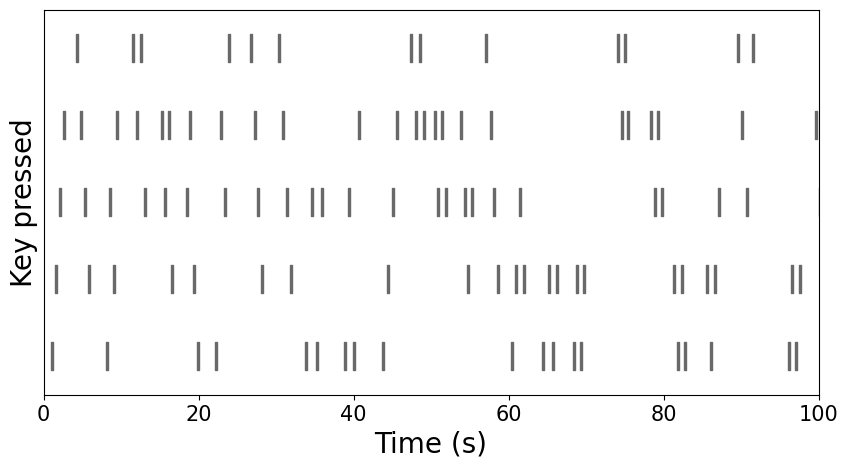

In [6]:



plt.figure(figsize=(10, 5))
plt.scatter(times, midi_values, marker=marker, s=100, color='dimgrey') 
plt.xlim(0, 100)
plt.ylim(52, 62)


plt.xlabel('Time (s)', fontsize = axis_fontsize)
plt.yticks([])
plt.xticks(fontsize = xtick_fontsize)
plt.ylabel('Key pressed', fontsize = axis_fontsize)
# plt.savefig('midi_example.svg')

## Analyze keystrokes in each map

In [64]:
key_inv_map = {
    53: 55,
    55: 53,
    57: 52,
    59: 50,
    60: 48
}

key_shinv_map = {
    53: 57, 
    55: 55,
    57: 53,
    59: 52,
    60: 50
}

In [73]:
#test for one file
subject = '14'

midi_values_shinv, times_shinv = onsets_pitch_from_midi(f'./ableton_midi/shinv_wur_{subject}_pre.mid')
midi_values_inv, times_inv = onsets_pitch_from_midi(f'./ableton_midi/inv_wur_{subject}_pre.mid')
midi_values_norm, times_norm = onsets_pitch_from_midi(f'./ableton_midi/norm_wur_{subject}_pre.mid')

midi_values_inv_mapped = [key_inv_map[x] for x in midi_values_inv]
midi_values_shinv_mapped = [key_shinv_map[x] for x in midi_values_shinv]

#make dataframes and concatenate
inv_df = pd.DataFrame({
    'time': times_inv,
    'midi_values': midi_values_inv_mapped
})
inv_df['map'] = 'inv'

shinv_df = pd.DataFrame({
    'time': times_shinv,
    'midi_values': midi_values_shinv_mapped
})
shinv_df['map'] = 'shinv'

norm_df = pd.DataFrame({
    'time': times_norm,
    'midi_values': midi_values_norm
})
norm_df['map'] = 'norm'
df_keystrokes = pd.concat([inv_df, shinv_df, norm_df], ignore_index=True)

#add info about epochtype and map
df_keystrokes.sort_values(by='time', inplace=True)
df_keystrokes['map_change'] = df_keystrokes['map'] != df_keystrokes['map'].shift()
df_keystrokes['epochtype'] = df_keystrokes['map_change'].map({True: 'first', False: 'other'})

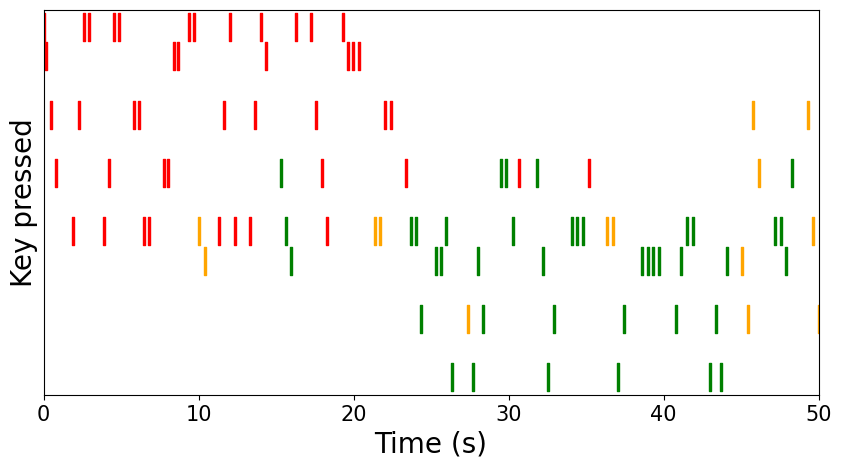

In [74]:
#plot according to different mappings
plt.figure(figsize=(10, 5))
plt.scatter(times_shinv, midi_values_shinv_mapped, marker=marker, s=100, color='orange') 
plt.scatter(times_inv, midi_values_inv_mapped, marker=marker, s=100, color='green') 
plt.scatter(times_norm, midi_values_norm, marker=marker, s=100, color='red')
plt.xlim(0, 50)
# plt.ylim(52, 62)


plt.xlabel('Time (s)', fontsize = axis_fontsize)
plt.yticks([])
plt.xticks(fontsize = xtick_fontsize)
plt.ylabel('Key pressed', fontsize = axis_fontsize)
plt.savefig('midi_example.svg')

In [ ]:

%%R
install.packages("lme4", repos="https://cran.r-project.org")
install.packages("simr", repos="https://cran.r-project.org")

R[write to console]: Avis :
R[write to console]:  les dépendances '‘Matrix’, ‘MASS’' ne sont pas disponibles

R[write to console]: installation des dépendances ‘nloptr’, ‘reformulas’


R[write to console]: essai de l'URL 'https://cran.r-project.org/src/contrib/nloptr_2.2.1.tar.gz'



In [ ]:
#loop through subject recordings
subjects_to_process = ['13', '14', '15', '16', '17', '18', '19', '20']
# subjects_to_process = ['13', '14']

for subject in subjects_to_process:
    midi_values_shinv, times_shinv = onsets_pitch_from_midi(f'./midi_ableton_keystrokes/shinv_wur_{subject}_pre.mid')
    midi_values_inv, times_inv = onsets_pitch_from_midi(f'./midi_ableton_keystrokes/inv_wur_{subject}_pre.mid')
    midi_values_norm, times_norm = onsets_pitch_from_midi(f'./midi_ableton_keystrokes/norm_wur_{subject}_pre.mid')
    
    midi_values_inv_mapped = [key_inv_map[x] for x in midi_values_inv]
    midi_values_shinv_mapped = [key_shinv_map[x] for x in midi_values_shinv]

    #make dataframes and concatenate
    inv_df = pd.DataFrame({
        'time': times_inv,
        'midi_values': midi_values_inv_mapped
    })s
    inv_df['map'] = 'inv'

    shinv_df = pd.DataFrame({
        'time': times_shinv,
        'midi_values': midi_values_shinv_mapped
    })
    shinv_df['map'] = 'shinv'

    norm_df = pd.DataFrame({
        'time': times_norm,
        'midi_values': midi_values_norm
    })
    norm_df['map'] = 'norm'
    
    df_keystrokes = pd.concat([inv_df, shinv_df, norm_df], ignore_index=True)

    #add info about epochtype and map
    df_keystrokes.sort_values(by='time', inplace=True)
    df_keystrokes['map_change'] = df_keystrokes['map'] != df_keystrokes['map'].shift()
    df_keystrokes['epochtype'] = df_keystrokes['map_change'].map({True: 'first', False: 'other'})

    #save to csv
    df_keystrokes.to_csv(f'./keystroke_data/keystrokes_{subject}_pre.csv', index=False)